# Loading requirements

#### Loading the database and the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()
movies

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## EDA

#### Exploring the data to extract useful information out of it.

AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


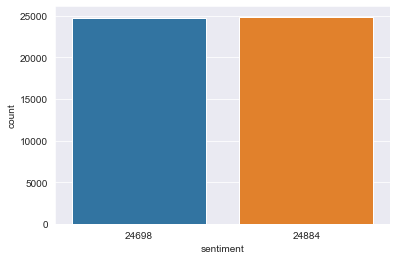

In [2]:
print(sns.countplot(data=movies.sentiment.value_counts(),x=movies.sentiment))
print(movies.sentiment.value_counts())

<AxesSubplot:ylabel='Frequency'>

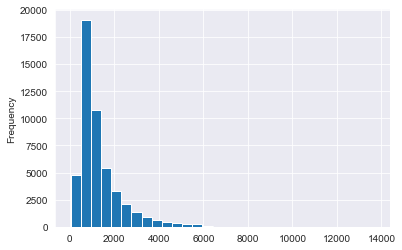

In [3]:
movies["length"]  = movies.review.apply(len)
movies.length.plot(bins=30,kind="hist")

In [49]:
movies.length.describe()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: length, dtype: float64

In [50]:
print(1310+990)
print(1310-990)

2300
320


In [51]:
movies[movies.length >= ((13704)/3)]

,review,sentiment,length
156,From the film's first shot - Keira Knightley a...,negative,5254
177,"Though I'd heard that ""Cama de Gato"" was the w...",negative,4756
263,"There is a difference between a ""film,"" and a ...",negative,5101
310,"Some people drift through life, moving from on...",positive,5862
320,"""Quitting"" may be as much about exiting a pre-...",positive,5552
...,...,...,...
49803,"There is NOTHING cool, hip, or clever about th...",negative,4778
49833,THE SHOP AROUND THE CORNER is one of the sweet...,positive,6620
49861,"OK OK, it might be hard to put the entirety of...",negative,5452
49948,"It is the early morning of our discontent, and...",negative,5847


In [8]:
import string
from nltk.corpus import stopwords
import nltk 

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()
    
    # Now just remove any stopwords
    # [print(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    # return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return nopunc


In [11]:
movies["review_nopunc"] = movies.review.apply(text_process)

# Rookie mistake...

In [15]:
movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

0        [one, reviewers, mentioned, watching, 1, oz, e...
1        [wonderful, little, production, br, br, filmin...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, theres, family, little, boy, jake,...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review_nopunc, Length: 49582, dtype: object

## Saving the dataframe after time-consuming algorithms will shorten the development time. I've spent too much time just waiting for things to finish processing when most of this could've been solved with simple dataframe updating and saving...

In [18]:
movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

In [ ]:
movies.to_csv("clean_movies_database.csv",index=False)

In [ ]:
movies["review_clean"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review_nopunc, Length: 49582, dtype: object

https://www.youtube.com/watch?v=xvqsFTUsOmc

# Training and fitting a model. 

#### Using a SVM Classifier.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = movies.review[0:40000]
y = movies.sentiment[0:40000]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")


model = SVC(kernel="linear")
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))

data_sample = movies[40000:45000]

X_val_vectors = vectorizer.transform(data_sample.review)
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(data_sample.sentiment, predictions_newdata))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      SVC(kernel='linear')

Model fitted with training vectors.

Model mean average score:    0.99978125

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      4035
    positive       0.86      0.87      0.86      3965

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      2465
    positive       0.86      0.86      0.86      2535

    accuracy                           0.86      5000
  

In [22]:
data_sample = movies[45000:]

X_val_vectors = vectorizer.transform(data_sample.review)
y_val_vectors = vectorizer.transform(data_sample.sentiment)

predictions_newdata = model.predict(X_val_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(data_sample.sentiment, predictions_newdata))

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      2291
    positive       0.86      0.85      0.86      2291

    accuracy                           0.86      4582
   macro avg       0.86      0.86      0.86      4582
weighted avg       0.86      0.86      0.86      4582



# Saving the model

#### For future uses and to be time efficient

In [ ]:

with open('pickle_model.pickle', 'wb') as f:
    pickle.dump(model, f)
    
with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

# Sources

    KG:     https://www.youtube.com/watch?v=M9Itm95JzL0   (watched this completely)
    KG:     https://www.youtube.com/watch?v=vyOgWhwUmec
    FCC:    https://www.youtube.com/watch?v=X2vAabgKiuM
    DS:     https://www.youtube.com/watch?v=hHr_cBKkRfQ
    SDX:    https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL

    https://www.kdnuggets.com/2019/01/solve-90-nlp-problems-step-by-step-guide.html


# Model testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import pickle

sns.set_style("darkgrid")

movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()
movies

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
with open('pickle_model.pickle', 'rb') as g:
    loaded_model = pickle.load(g)

In [8]:
X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.97      0.97      0.97      4949
    positive       0.97      0.97      0.97      4968

    accuracy                           0.97      9917
   macro avg       0.97      0.97      0.97      9917
weighted avg       0.97      0.97      0.97      9917



## Predictions

#### Set up different variables to fine tune the model

In [4]:
from sklearn.model_selection import train_test_split

X = movies.review
y = movies.sentiment
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",binary=False)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")

from sklearn.metrics import classification_report
predictions = loaded_model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {loaded_model}")
print (classification_report(y_test, predictions))

Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model fitted with testing vectors.

 --- Classification report for SVC(kernel='linear')
              precision    recall  f1-score   support

    negative       0.93      0.96      0.95      4850
    positive       0.96      0.93      0.95      5067

    accuracy                           0.95      9917
   macro avg       0.95      0.95      0.95      9917
weighted avg       0.95      0.95      0.95      9917



In [25]:
movies = movies[0:10000]

In [3]:
bow_transformer = CountVectorizer(stop_words="english",binary=False).fit(movies.review)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

101583


In [5]:
movies_review = bow_transformer.transform(movies['review'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(movies_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
X=movies.review
y=movies.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train/test split finished.\n")


vectorizer = CountVectorizer(stop_words="english",binary=True)
print("Vectorizer created.\n")
train_X_vectors = vectorizer.fit_transform(X_train)
print("Bag of words fitted into a vector.\n")

X_train_vectors = vectorizer.transform(X_train)
y_train_vectors = vectorizer.transform(y_train)
X_test_vectors = vectorizer.transform(X_test)
y_test_vectors = vectorizer.transform(y_test)
print("Train/test split fitted into the bag of words vector.\n")


model = TfidfTransformer()
print(f"Model created, currently using:      {model}\n")
model.fit(X_train_vectors, y_train)
print("Model fitted with training vectors.\n")
# print(f"Model mean average score:    {model.score(X_train_vectors, y_train)}\n")

predictions = model.predict(X_test_vectors)
print("Model fitted with testing vectors.\n")
print(f" --- Classification report for {model}")
print (classification_report(y_test, predictions))



Train/test split finished.

Vectorizer created.

Bag of words fitted into a vector.

Train/test split fitted into the bag of words vector.

Model created, currently using:      TfidfTransformer()

Model fitted with training vectors.



AttributeError: 'TfidfTransformer' object has no attribute 'predict'